# Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # visualizing data
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder

# Import Data


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving crop_production.csv to crop_production.csv


In [ ]:
# import csv file
df = pd.read_csv('crop_production.csv', encoding= 'unicode_escape')

# Data Cleaning and Preprocessing

In [ ]:
df.shape

(246091, 7)

In [ ]:
df.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246091 entries, 0 to 246090
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State_Name     246091 non-null  object 
 1   District_Name  246091 non-null  object 
 2   Crop_Year      246091 non-null  int64  
 3   Season         246091 non-null  object 
 4   Crop           246091 non-null  object 
 5   Area           246091 non-null  float64
 6   Production     242361 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 13.1+ MB


In [ ]:
#check for null values, gives sum of null values in each column
pd.isnull(df).sum()

,0
State_Name,0
District_Name,0
Crop_Year,0
Season,0
Crop,0
Area,0
Production,3730


In [ ]:
# drop null values, inplace for permanent changes
df.dropna(inplace=True)

In [ ]:
df.shape

(242361, 7)

In [ ]:
pd.isnull(df).sum() #rechecking nulls

,0
State_Name,0
District_Name,0
Crop_Year,0
Season,0
Crop,0
Area,0
Production,0


In [ ]:
df['Area'] = df['Area'].astype('int')

In [ ]:
df['Production'] = df['Production'].astype('int')

In [ ]:
df.columns #List of all columns

Index(['State_Name', 'District_Name', 'Crop_Year', 'Season', 'Crop', 'Area',
       'Production'],
      dtype='object')

# Exploratory Data Analysis (EDA)

In [ ]:
# describe() method returns description of the data in the DataFrame (i.e. count, mean, std, etc)
print(df.describe())

           Crop_Year          Area    Production
count  242361.000000  2.423610e+05  2.423610e+05
mean     2005.625773  1.216741e+04  5.825034e+05
std         4.958285  5.085744e+04  1.706581e+07
min      1997.000000  0.000000e+00  0.000000e+00
25%      2002.000000  8.700000e+01  8.800000e+01
50%      2006.000000  6.030000e+02  7.290000e+02
75%      2010.000000  4.545000e+03  7.023000e+03
max      2015.000000  8.580100e+06  1.250800e+09


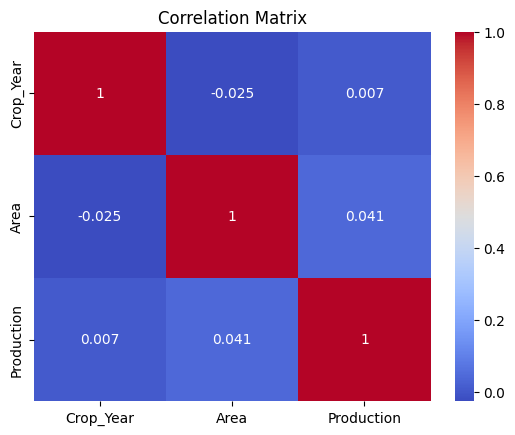

In [ ]:
sns.heatmap(df[['Crop_Year', 'Area', 'Production']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

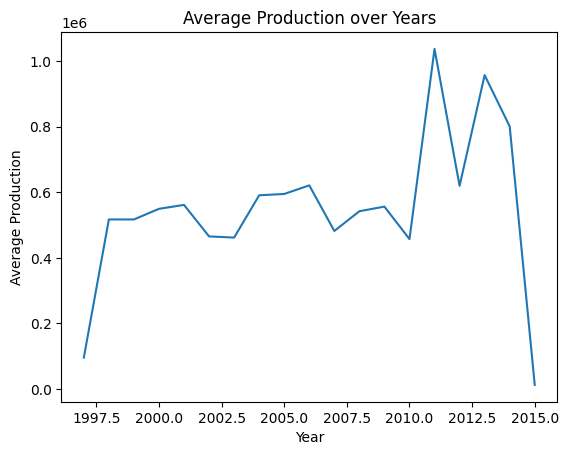

In [ ]:
df.groupby('Crop_Year')['Production'].mean().plot(kind='line', title='Average Production over Years')
plt.xlabel('Year')
plt.ylabel('Average Production')
plt.show()

# Feature Engineering

In [ ]:
X = df[['Area', 'Crop_Year']]
y = df['Production']

In [ ]:
categorical_features = ['Season', 'Crop']
df_encoded = pd.get_dummies(df, columns=categorical_features, drop_first=True)

In [ ]:
X = df_encoded.drop(columns=['State_Name', 'District_Name', 'Production'])

# Model Training: Linear Regression

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Ensure X_test has the same columns as X_train
missing_cols = set(X_train.columns) - set(X_test.columns)
for col in missing_cols:
    X_test[col] = 0

# Ensure columns are in the same order
X_test = X_test[X_train.columns]


In [ ]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = linear_model.predict(X_test)

In [ ]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [ ]:
print("Linear Regression Results:")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

Linear Regression Results:
Mean Absolute Error (MAE): 1163002.3940951724
Mean Squared Error (MSE): 350272813227356.75
R-squared (R2): 0.1294061628642451


# Model Training: Decision Tree Regressor

In [ ]:
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [ ]:
y_pred_tree = tree_model.predict(X_test)

In [ ]:
mae_tree = mean_absolute_error(y_test, y_pred_tree)
mse_tree = mean_squared_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)

In [ ]:
print("Decision Tree Results:")
print(f"Mean Absolute Error (MAE): {mae_tree}")
print(f"Mean Squared Error (MSE): {mse_tree}")
print(f"R-squared (R2): {r2_tree}")

Decision Tree Results:
Mean Absolute Error (MAE): 468330.8727319971
Mean Squared Error (MSE): 223463067733991.9
R-squared (R2): 0.4445884400671811


# Model Evaluation and Comparison

In [ ]:
comparison_df = pd.DataFrame({
    "Metric": ["Mean Absolute Error (MAE)", "Mean Squared Error (MSE)", "R-squared (R2)"],
    "Linear Regression": [mae_linear, mse_linear, r2_linear],
    "Decision Tree": [mae_tree, mse_tree, r2_tree]
})

In [ ]:
print("\nComparative Analysis of Linear Regression and Decision Tree:")
print(comparison_df)


Comparative Analysis of Linear Regression and Decision Tree:
                      Metric  Linear Regression  Decision Tree
0  Mean Absolute Error (MAE)       1.163002e+06   4.683309e+05
1   Mean Squared Error (MSE)       3.502728e+14   2.234631e+14
2             R-squared (R2)       1.294062e-01   4.445884e-01


In [ ]:
# Calculate the best values for each metric
best_mae = min(mae_linear, mae_tree)
best_mse = min(mse_linear, mse_tree)
best_r2 = max(r2_linear, r2_tree)

# Calculate percentage improvement relative to the best performing model for each metric
comparison_df['Linear Regression (%)'] = [
    (best_mae / mae_linear) * 100 if mae_linear != 0 else 0,
    (best_mse / mse_linear) * 100 if mse_linear != 0 else 0,
    (r2_linear / best_r2) * 100 if best_r2 != 0 else 0
]

comparison_df['Decision Tree (%)'] = [
    (best_mae / mae_tree) * 100 if mae_tree != 0 else 0,
    (best_mse / mse_tree) * 100 if mse_tree != 0 else 0,
    (r2_tree / best_r2) * 100 if best_r2 != 0 else 0
]

# Display the updated comparison table
print("\nComparative Analysis with Percentage Scores:")
print(comparison_df)


Comparative Analysis with Percentage Scores:
                      Metric  Linear Regression  Decision Tree  \
0  Mean Absolute Error (MAE)       1.163002e+06   4.683309e+05   
1   Mean Squared Error (MSE)       3.502728e+14   2.234631e+14   
2             R-squared (R2)       1.294062e-01   4.445884e-01   

   Linear Regression (%)  Decision Tree (%)  
0              40.269124              100.0  
1              63.796863              100.0  
2              29.106956              100.0  


# Predicting Production for New Inputs

In [ ]:
def predict_production():
    # Get user input for each feature
    state_name = input("Enter State Name: ")
    district_name = input("Enter District Name: ")
    crop = input("Enter Crop: ")
    area = float(input("Enter Area (in hectares): "))
    crop_year = int(input("Enter Crop Year: "))
    season = input("Enter Season: ")

    # Create a DataFrame with the input values
    input_data = pd.DataFrame({
        'State_Name': [state_name],
        'District_Name': [district_name],
        'Crop': [crop],
        'Area': [area],
        'Crop_Year': [crop_year],
        'Season': [season]
    })

    # One-hot encode the categorical features
    input_data_encoded = pd.get_dummies(input_data, columns=['State_Name', 'District_Name', 'Crop', 'Season'], drop_first=True)

    # Use reindex to add missing columns and align with training data structure
    input_data_encoded = input_data_encoded.reindex(columns=X_train.columns, fill_value=0)

    # Make predictions using the trained models
    linear_pred = linear_model.predict(input_data_encoded)[0]
    tree_pred = tree_model.predict(input_data_encoded)[0]

    # Display predictions
    print(f"\nPredicted Production using Linear Regression: {linear_pred}")
    print(f"Predicted Production using Decision Tree: {tree_pred}")

# Call the function to test
predict_production()


Enter State Name: Uttar Pradesh
Enter District Name: Kanpur
Enter Crop: 100
Enter Area (in hectares): 2010
Enter Crop Year: 2010
Enter Season: Kharif

Predicted Production using Linear Regression: 278955.03201012313
Predicted Production using Decision Tree: 315.0


In [ ]:
import pandas as pd

# Example list
input_list = [
    {'State_Name': 'Bihar', 'District_Name': 'Vaishali', 'Crop': 'Maize', 'Area': 100, 'Crop_Year': 2023, 'Season': 'Kharif'},
    {'State_Name': 'Uttar Pradesh', 'District_Name': 'Kanpur', 'Crop': 'Wheat', 'Area': 150, 'Crop_Year': 2024, 'Season': 'Rabi'},
    {'State_Name': 'Punjab', 'District_Name': 'Ludhiana', 'Crop': 'Rice', 'Area': 200, 'Crop_Year': 2025, 'Season': 'Kharif'},
    # Add more rows as needed
]

# Convert the list of dictionaries to a DataFrame
input_data = pd.DataFrame(input_list)

# One-hot encode the categorical features
input_data_encoded = pd.get_dummies(input_data, columns=['State_Name', 'District_Name', 'Crop', 'Season'], drop_first=True)

# Ensure input_data_encoded has the same columns as the training data
input_data_encoded = input_data_encoded.reindex(columns=X_train.columns, fill_value=0)

# Make predictions with both models
linear_preds = linear_model.predict(input_data_encoded)
tree_preds = tree_model.predict(input_data_encoded)

# Add predictions to the DataFrame
input_data['Predicted Production (Linear Regression)'] = linear_preds
input_data['Predicted Production (Decision Tree)'] = tree_preds

# Display the results
print("Predictions for the input list:")
print(input_data)


Predictions for the input list:
      State_Name District_Name   Crop  Area  Crop_Year  Season  \
0          Bihar      Vaishali  Maize   100       2023  Kharif   
1  Uttar Pradesh        Kanpur  Wheat   150       2024    Rabi   
2         Punjab      Ludhiana   Rice   200       2025  Kharif   

   Predicted Production (Linear Regression)  \
0                             594892.228061   
1                              56842.717119   
2                             123808.896525   

   Predicted Production (Decision Tree)  
0                                 100.0  
1                                 274.0  
2                                 300.0  
